<a href="https://colab.research.google.com/github/donw385/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats


In [35]:
#load data

credit = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None)
credit.head(100)
credit.shape

(690, 16)

In [14]:
#appropriate number of observations, all have same
credit.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,690,690,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,12,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


In [53]:
#replace missing value question marks with na

credit = credit.replace({'?':'na'})

credit.head(100)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [34]:
#validate types, nas are objects so numbers column classified as object

credit.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [47]:
plus = credit[credit[15] == '+']
plus.shape


(307, 16)

In [48]:
minus = credit[credit[15] == '-']
minus.shape

(383, 16)

In [66]:
#column 1 crosstab
pd.crosstab(credit[15],credit[0], dropna=True)


,__dummy__,__dummy__,__dummy__
15,,,
+,98,206,3
-,112,262,9


In [58]:
credit[0].value_counts()

b     468
a     210
na     12
Name: 0, dtype: int64

In [92]:
#column 3 statistic, very low p value, statistically significant
stats.ttest_ind(plus[2], minus[2], nan_policy='omit', equal_var=False)



Ttest_indResult(statistic=5.392530906223675, pvalue=1.0158807568737146e-07)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


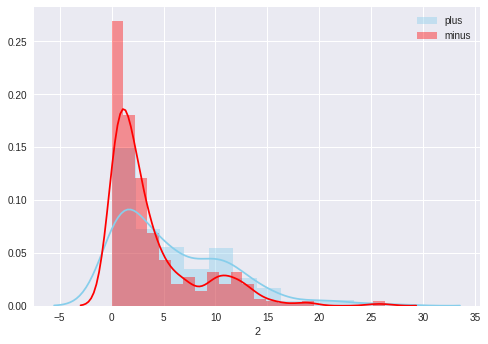

In [133]:
# column 3 graph

sns.distplot( plus[2] , color="skyblue", label="plus")
sns.distplot( minus[2] , color="red", label="minus")
sns.plt.legend();
 


In [93]:
#column 8 statistic,  very low p value, statistically significant
stats.ttest_ind(plus[7], minus[7], nan_policy='omit', equal_var=False)



Ttest_indResult(statistic=8.38006008674286, pvalue=7.425348666782441e-16)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


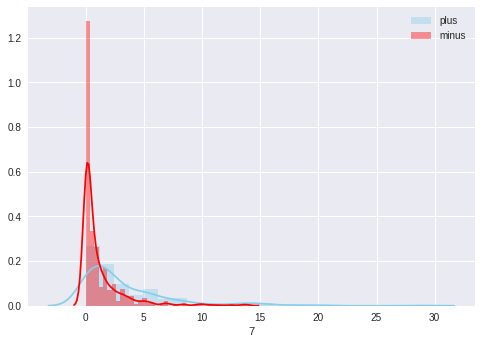

In [134]:
# column 8 graph

sns.distplot( plus[7] , color="skyblue", label="plus")
sns.distplot( minus[7] , color="red", label="minus")
sns.plt.legend();

In [94]:
#column 11 statistic,  very low p value, statistically significant
stats.ttest_ind(plus[10], minus[10], nan_policy='omit', equal_var=False)



Ttest_indResult(statistic=10.6384190682749, pvalue=4.310254123415665e-23)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


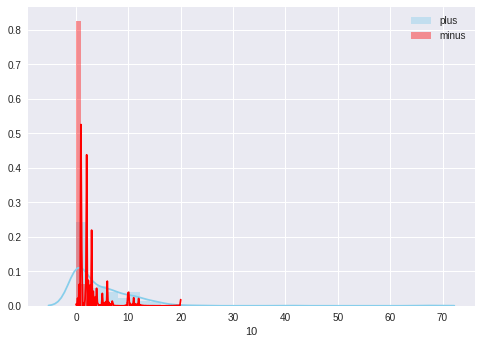

In [135]:
# column 11 graph

sns.distplot( plus[10] , color="skyblue", label="plus")
sns.distplot( minus[10] , color="red", label="minus")
sns.plt.legend();

In [96]:
#column 15 statistic,  very low p value, statistically significant
stats.ttest_ind(plus[14], minus[14], nan_policy='omit', equal_var=False)



Ttest_indResult(statistic=4.196600236397611, pvalue=3.5433798702024966e-05)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


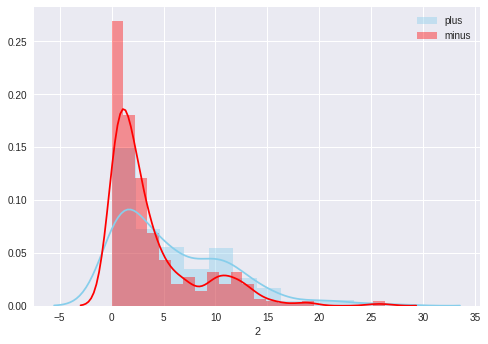

In [136]:
# column 15 graph

sns.distplot( plus[2] , color="skyblue", label="plus")
sns.distplot( minus[2] , color="red", label="minus")
sns.plt.legend();

In [97]:
# column 4, crosstab
table_4 = pd.crosstab(credit[15],credit[3])
table_4

3,l,na,u,y
15,,,,
+,2,4,256,45
-,0,2,263,118


In [99]:
#returns test statistic, p-value, degrees of freedom, and expected frequencies
#very low p-value, can reject null that the data is independent

stats.chi2_contingency(table_4)

(27.415923419169303,
 4.816178195213086e-06,
 3,
 array([[  0.88985507,   2.66956522, 230.9173913 ,  72.52318841],
        [  1.11014493,   3.33043478, 288.0826087 ,  90.47681159]]))

In [101]:
# column 5, crosstab
table_5 = pd.crosstab(credit[15],credit[4])
table_5

4,g,gg,na,p
15,,,,
+,256,2,4,45
-,263,0,2,118


In [102]:
#returns test statistic, p-value, degrees of freedom, and expected frequencies
#very low p-value, can reject null that the data is independent

stats.chi2_contingency(table_5)

(27.415923419169303,
 4.816178195213086e-06,
 3,
 array([[230.9173913 ,   0.88985507,   2.66956522,  72.52318841],
        [288.0826087 ,   1.11014493,   3.33043478,  90.47681159]]))

In [103]:
# column 6, crosstab
table_6 = pd.crosstab(credit[15],credit[5])
table_6

5,aa,c,cc,d,e,ff,i,j,k,m,na,q,r,w,x
15,,,,,,,,,,,,,,,
+,19,62,29,7,14,7,14,3,14,16,4,51,2,33,32
-,35,75,12,23,11,46,45,7,37,22,5,27,1,31,6


In [104]:
#returns test statistic, p-value, degrees of freedom, and expected frequencies
#very low p-value, can reject null that the data is independent

stats.chi2_contingency(table_6)

(98.32549200027749,
 9.921414011107358e-15,
 14,
 array([[24.02608696, 60.95507246, 18.24202899, 13.34782609, 11.12318841,
         23.58115942, 26.25072464,  4.44927536, 22.69130435, 16.90724638,
          4.00434783, 34.70434783,  1.33478261, 28.47536232, 16.90724638],
        [29.97391304, 76.04492754, 22.75797101, 16.65217391, 13.87681159,
         29.41884058, 32.74927536,  5.55072464, 28.30869565, 21.09275362,
          4.99565217, 43.29565217,  1.66521739, 35.52463768, 21.09275362]]))

In [105]:
# column 7, crosstab
table_7 = pd.crosstab(credit[15],credit[6])
table_7

6,bb,dd,ff,h,j,n,na,o,v,z
15,,,,,,,,,,
+,25,2,8,87,3,2,4,1,169,6
-,34,4,49,51,5,2,5,1,230,2


In [106]:
#returns test statistic, p-value, degrees of freedom, and expected frequencies
#very low p-value, can reject null that the data is independent

stats.chi2_contingency(table_7)

(45.03434398100401,
 9.092647404039867e-07,
 9,
 array([[ 26.25072464,   2.66956522,  25.36086957,  61.4       ,
           3.55942029,   1.77971014,   4.00434783,   0.88985507,
         177.52608696,   3.55942029],
        [ 32.74927536,   3.33043478,  31.63913043,  76.6       ,
           4.44057971,   2.22028986,   4.99565217,   1.11014493,
         221.47391304,   4.44057971]]))

In [108]:
# column 9, crosstab
table_9 = pd.crosstab(credit[15],credit[8])
table_9

8,f,t
15,,
+,23,284
-,306,77


In [109]:
#returns test statistic, p-value, degrees of freedom, and expected frequencies
#very low p-value, can reject null that the data is independent

stats.chi2_contingency(table_9)

(355.2038167412799,
 3.1185900878457007e-79,
 1,
 array([[146.38115942, 160.61884058],
        [182.61884058, 200.38115942]]))

In [110]:
# column 10, crosstab
table_10 = pd.crosstab(credit[15],credit[9])
table_10

9,f,t
15,,
+,98,209
-,297,86


In [111]:
#returns test statistic, p-value, degrees of freedom, and expected frequencies
#very low p-value, can reject null that the data is independent

stats.chi2_contingency(table_10)

(143.06956205083145,
 5.675727374527571e-33,
 1,
 array([[175.74637681, 131.25362319],
        [219.25362319, 163.74637681]]))

In [113]:
# column 12, crosstab
table_12 = pd.crosstab(credit[15],credit[11])
table_12

11,f,t
15,,
+,161,146
-,213,170


In [114]:
#returns test statistic, p-value, degrees of freedom, and expected frequencies
#very high p-value, CANNOT reject null that the data is independent

stats.chi2_contingency(table_12)

(0.568273300792113,
 0.45094587758631943,
 1,
 array([[166.40289855, 140.59710145],
        [207.59710145, 175.40289855]]))

In [115]:
# column 13, crosstab
table_13 = pd.crosstab(credit[15],credit[12])
table_13

12,g,p,s
15,,,
+,287,5,15
-,338,3,42


In [116]:
#returns test statistic, p-value, degrees of freedom, and expected frequencies
#relatively low p-value of 0.01, probably can reject null that the data is
# independent given standard threshold of .05, but if need 1% floor, then cannot reject

stats.chi2_contingency(table_13)

(9.191570451545383,
 0.010094291370456362,
 2,
 array([[278.07971014,   3.55942029,  25.36086957],
        [346.92028986,   4.44057971,  31.63913043]]))

In [126]:
#all categories in one table
pd.options.display.max_columns = 500

summary_categories = pd.concat([table_4,table_5,table_6,table_7,table_9,table_10,table_12,table_13],axis=1)
summary_categories

,l,na,u,y,g,gg,na,p,aa,c,cc,d,e,ff,i,j,k,m,na,q,r,w,x,bb,dd,ff,h,j,n,na,o,v,z,f,t,f,t,f,t,g,p,s
15,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
+,2,4,256,45,256,2,4,45,19,62,29,7,14,7,14,3,14,16,4,51,2,33,32,25,2,8,87,3,2,4,1,169,6,23,284,98,209,161,146,287,5,15
-,0,2,263,118,263,0,2,118,35,75,12,23,11,46,45,7,37,22,5,27,1,31,6,34,4,49,51,5,2,5,1,230,2,306,77,297,86,213,170,338,3,42


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

* **t test analysis**: The t test analysis I ran was comparing the numerical values for the columns between the values in the approved cases versus the values in the same column for the rejected cases. The null hypothesis that the 2 data sets have identical averages and distributions, and if we can reject the null if the p-value is low enough, then that means the numerical values in approved vs. rejected datasets are statistically different. In other words, this means that the column has meaningfully different values for approved vs. rejected cases, so the column's data can be used to potentially determine rejection vs. approval. For the following columns, test rejected the null hypothesis (column 3, p value 1.02e-07, column 8, p value 7.42e-16, column 11, p value 4.31e-23, column 11 p value 3.54e-05)

* **chi square test analysis**: 